In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

# 데이터 읽기

In [2]:
origin_df = pd.read_csv("basline_data.csv",index_col='Date',parse_dates=True)

In [3]:
origin_df.head()

,Open,High,Low,Close,Adj Close,Volume,next_price,next_rtn,log_return,CCI,MA5,MA10,RASD5,RASD10,MACD,ATR,ub,middle,lb,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX,KOSPI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-04,7068.327148,7109.184570,6913.069336,7027.469727,6893.216309,2256630,6813.062500,-0.005780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1188.050049,410.359985,13.98,886.900024
2005-01-05,6913.069336,6978.440918,6815.011230,6945.754883,6813.062500,1773241,6853.140137,0.004728,-0.011696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-81.714844,NaN,NaN,NaN,1183.739990,404.250000,14.09,885.190002
2005-01-06,6978.440918,7305.299805,6847.697266,6986.612305,6853.140137,7480900,7085.585449,0.001171,0.005865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.857422,NaN,NaN,NaN,1187.890015,402.140015,13.58,871.280029
2005-01-07,7043.812500,7231.756836,7019.298340,7223.585449,7085.585449,4612385,7253.907715,0.025522,0.033356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.973145,196.115723,NaN,NaN,1186.189941,407.559998,13.49,870.840027
2005-01-10,7313.471680,7599.473145,7313.471680,7395.186035,7253.907715,4720077,7334.061523,0.011173,0.023478,NaN,7115.72168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.600586,449.431152,NaN,NaN,1190.250000,406.250000,13.23,874.179993


In [4]:
origin_df.tail()

,Open,High,Low,Close,Adj Close,Volume,next_price,next_rtn,log_return,CCI,MA5,MA10,RASD5,RASD10,MACD,ATR,ub,middle,lb,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX,KOSPI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-09,438000.0,449000.0,435000.0,447500.0,447500.0,528032,446500.0,0.021689,0.006726,26.666667,439100.0,439600.0,5373.184141,6152.449980,7251.560365,12495.519527,456037.580888,441550.0,427062.419112,3000.0,14500.0,30.656934,-40.697674,4432.350098,3399.760010,NaN,3260.419922
2021-08-10,446000.0,453500.0,442500.0,446500.0,446500.0,461940,445000.0,0.001121,-0.002237,55.327725,442800.0,439050.0,5422.503498,5711.680179,7252.329243,12388.696704,456468.343198,441825.0,427181.656802,-1000.0,4000.0,29.796512,-43.023256,4436.750000,3358.870117,16.790001,3243.189941
2021-08-11,445000.0,449000.0,442000.0,445000.0,445000.0,446275,440500.0,0.000000,-0.003365,28.555888,445200.0,439350.0,5037.213208,5341.140286,7050.625894,12003.789796,456554.492498,441875.0,427195.507502,-1500.0,500.0,27.324750,-46.511628,4442.410156,3350.929932,16.170000,3220.620117
2021-08-12,448000.0,448500.0,438000.0,440500.0,440500.0,671083,436500.0,-0.016741,-0.010164,1.881720,444800.0,439450.0,4580.410134,5024.363850,6453.272832,11896.376240,455767.471844,441450.0,427132.528156,-4500.0,-7000.0,25.498575,-56.976744,4460.830078,3312.959961,15.590000,3208.379883
2021-08-13,445000.0,446000.0,433000.0,436500.0,436500.0,515855,NaN,-0.019101,-0.009122,-30.701754,443200.0,439750.0,4160.517220,4711.896297,5592.631285,11975.206508,455159.728659,440925.0,426690.271341,-4000.0,-10000.0,21.250000,-64.634146,4468.000000,3335.040039,15.450000,3171.290039


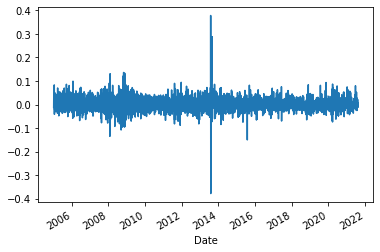

In [5]:
origin_df['log_return'].plot()

In [6]:
origin_df['next_price'] = origin_df['Close'].shift(-60)

In [7]:
origin_df.shape

(4103, 27)

In [8]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4103 entries, 2005-01-04 to 2021-08-13
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        4103 non-null   float64
 1   High        4103 non-null   float64
 2   Low         4103 non-null   float64
 3   Close       4103 non-null   float64
 4   Adj Close   4103 non-null   float64
 5   Volume      4103 non-null   int64  
 6   next_price  4043 non-null   float64
 7   next_rtn    4103 non-null   float64
 8   log_return  4102 non-null   float64
 9   CCI         4090 non-null   float64
 10  MA5         4099 non-null   float64
 11  MA10        4094 non-null   float64
 12  RASD5       4095 non-null   float64
 13  RASD10      4090 non-null   float64
 14  MACD        4070 non-null   float64
 15  ATR         4089 non-null   float64
 16  ub          4084 non-null   float64
 17  middle      4084 non-null   float64
 18  lb          4084 non-null   float64
 19  MTM1     

* null값 처리

In [9]:
origin_df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
next_price     60
next_rtn        0
log_return      1
CCI            13
MA5             4
MA10            9
RASD5           8
RASD10         13
MACD           33
ATR            14
ub             19
middle         19
lb             19
MTM1            1
MTM3            3
ROC            60
WPR            13
S&P500        124
SOX           125
VIX           125
KOSPI          20
dtype: int64

In [10]:
df = origin_df.dropna()

In [11]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
next_price    0
next_rtn      0
log_return    0
CCI           0
MA5           0
MA10          0
RASD5         0
RASD10        0
MACD          0
ATR           0
ub            0
middle        0
lb            0
MTM1          0
MTM3          0
ROC           0
WPR           0
S&P500        0
SOX           0
VIX           0
KOSPI         0
dtype: int64

In [12]:
df = df.loc['2011':'2020']

In [13]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
next_price    0
next_rtn      0
log_return    0
CCI           0
MA5           0
MA10          0
RASD5         0
RASD10        0
MACD          0
ATR           0
ub            0
middle        0
lb            0
MTM1          0
MTM3          0
ROC           0
WPR           0
S&P500        0
SOX           0
VIX           0
KOSPI         0
dtype: int64

In [14]:
df.shape

(2361, 27)

* 라벨링

In [15]:
diffs = df['next_price']-df['Close']
df['label'] = np.where(diffs>0,1,0)

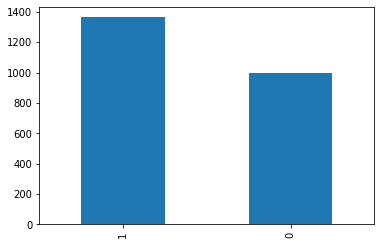

In [16]:
df['label'].value_counts().plot.bar()

# 간단한 탐색

In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,next_price,next_rtn,log_return,CCI,MA5,MA10,RASD5,RASD10,MACD,ATR,ub,middle,lb,MTM1,MTM3,ROC,WPR,S&P500,SOX,VIX,KOSPI,label
count,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2.361000e+03,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000
mean,131722.747553,133608.695135,129752.486680,131661.633383,130602.905094,6.931346e+05,139281.486238,-0.000393,0.000659,11.125044,131473.824708,131226.196814,2167.170951,2163.269769,686.637131,4085.774817,139361.563118,130745.755517,122129.947916,93.346508,284.979109,5.863839,-47.608454,2171.585684,925.461856,17.581266,2082.135075,0.577721
std,58470.714569,59275.245976,57667.475597,58469.959102,58525.762829,4.878242e+05,67020.411988,0.020165,0.025903,107.185490,58272.869743,58061.526894,1458.813604,1305.793255,3261.683199,2005.071469,61378.939755,57671.364157,54320.762484,3303.213157,5179.917664,17.730567,29.394045,637.302382,546.237002,7.539273,192.174369,0.494027
min,43513.113281,44738.832031,41306.812500,42900.250000,42080.683594,0.000000e+00,42900.250000,-0.106299,-0.378482,-344.272179,44616.261719,45278.151172,289.257583,331.063823,-9526.263083,1074.205594,47273.899038,45921.655664,41424.371050,-33101.859375,-28000.000000,-29.470199,-100.000000,1119.459961,326.320007,9.140000,1457.640015,0.000000
25%,71950.070312,73175.570312,70601.554688,71827.281250,70893.179688,3.972650e+05,100200.000000,-0.012629,-0.012809,-76.117681,71606.648438,71569.877344,1214.603810,1274.236961,-1145.294981,2737.933315,75116.872643,71710.835547,66268.794515,-1470.867188,-2206.296875,-5.758427,-74.358974,1640.420044,468.429993,13.020000,1959.449951,0.000000
50%,137400.000000,139000.000000,135000.000000,136800.000000,135562.484375,5.757040e+05,140200.000000,0.000000,0.000000,19.169027,136760.000000,136500.000000,1802.642795,1866.064274,392.972776,3788.758403,144844.927912,136070.000000,127205.600359,0.000000,200.000000,2.716688,-45.333362,2088.550049,687.450012,15.420000,2029.760010,1.000000
75%,159000.000000,160600.000000,157000.000000,159000.000000,157762.265625,8.421200e+05,160800.000000,0.011292,0.012903,93.471742,158360.000000,158140.000000,2599.038601,2608.160132,1964.847440,4740.574919,168200.881563,157970.000000,149674.837664,1470.859375,2696.585938,13.793103,-21.428550,2711.739990,1319.089966,19.400000,2161.510010,1.000000
max,337000.000000,347000.000000,336500.000000,339000.000000,338515.031250,1.010686e+07,403500.000000,0.099338,0.378485,466.666667,330300.000000,329600.000000,13600.366622,9348.574386,14590.290851,12365.436510,345609.295545,319625.000000,297790.190883,33102.078125,36411.523438,101.312647,-0.000000,3735.360107,2816.270020,82.690002,2873.469971,1.000000


In [18]:
# plt.figure(figsize=(12,12))
# sns.heatmap(df.corr(),linewidth=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)
# plt.show()

# 데이터 전처리

In [19]:
X = df.drop(['next_price','label'], axis=1).values
y = df['label'].values

* minmax scaler

In [20]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [21]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [22]:
np.isinf(X).sum()

0

# trn, tst 구분

In [23]:
# seed 값 설정
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=seed, stratify=y)

In [25]:
X_train.shape

(1888, 26)

# DNN & Random Forest 예측

In [26]:
from sklearn.ensemble import RandomForestClassifier # 앙상블
from sklearn.linear_model import LogisticRegression
# 개별 ML 모델을 위한 Classifier 생성.
rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=700, random_state=1)#랜덤포레스트
dnn_clf = Sequential() # DNN
dnn_clf.add(Dense(20, input_dim=26, activation='relu'))
dnn_clf.add(Dense(20, activation='relu'))
dnn_clf.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
dnn_clf.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [27]:
# 개별 모델들을 학습. 
rf_clf.fit(X_train , Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [28]:
# 모델을 실행합니다.
dnn_clf.fit(X_train,Y_train, epochs=500, batch_size=20)

Epoch 1/500
95/95 [==============================] - 1s 1ms/step - loss: 0.6830 - accuracy: 0.5662
Epoch 2/500
95/95 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.5779
Epoch 3/500
95/95 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.6017
Epoch 4/500
95/95 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6155
Epoch 5/500
95/95 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.6377
Epoch 6/500
95/95 [==============================] - 0s 1ms/step - loss: 0.6310 - accuracy: 0.6335
Epoch 7/500
95/95 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.6520
Epoch 8/500
95/95 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6419
Epoch 9/500
95/95 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.6568
Epoch 10/500
95/95 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6504
Epoch 11/

In [29]:
from sklearn.metrics import accuracy_score
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
rf_pred = rf_clf.predict(X_test)

# dnn 데이터 변환
pred_array = dnn_clf.predict(X_test)>0.5
dnn_pred = pred_array.reshape(-1).astype('int32')

In [30]:
dnn_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [31]:
rf_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [32]:
len(rf_pred) == len(dnn_pred)

True

In [33]:
print('DNN 정확도: {0:.4f}'.format(accuracy_score(Y_test, dnn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(Y_test, rf_pred)))

DNN 정확도: 0.9027
랜덤 포레스트 정확도: 0.9345


|모형|방법론|
|---|---|
|LDA/QDA|확률적 생성모형|
|나이브 베이지안|확률적 생성모형|
|로지스틱 회귀|확률적 판별모형|
|의사결정나무|확률적 판별모형|
|퍼셉트론|판별함수 모형|
|서포트벡터머신|판별함수 모형|
|인공신경망|판별함수 모형|


## 스태킹

In [34]:
# 시험데이터로 예측한 4가지 모델의 결과를 합침
pred = np.array([dnn_pred, rf_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

# 최종 분류기 모델 생성
lr_final = LogisticRegression(C=10)

# 최종 분류기 학습 및 예측
lr_final.fit(pred, Y_test)
final = lr_final.predict(pred)

(2, 473)
(473, 2)


### 스태킹 : 결과

In [35]:
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(Y_test , final)))

최종 메타 모델의 예측 정확도: 0.9345


## Kfold 기반 스태킹

In [36]:
from sklearn.model_selection import KFold, StratifiedKFold

In [37]:
# rf 스태킹 함수
def get_stacking_data1(model, X_train, Y_train, X_test, n_folds=5):
    kfold = KFold(n_splits=n_folds, random_state=0)

    #최종 모델에서 사용할 데이터 셋 세팅(0 값으로)
    #만약 shape가 (100, 10)이었으면 폴드의 검증 과정에서 저장할 데이터는 (100, 1)모양을 갖게 한다.
    train_fold_predict = np.zeros((X_train.shape[0], 1))
    #test는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold개수) 만큼 shape을 갖게 된다.
    #그래서 해당 폴드마다 X_test의 예측 값을 해당 fold에 해당되는 열에 넣는다.
    test_predict = np.zeros((X_test.shape[0], n_folds))
    print('model: ', model.__class__.__name__)

    for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
        X_train_ = X_train[train_index]
        Y_train_ = Y_train[train_index]
        X_validation = X_train[valid_index]

        #학습
        model.fit(X_train_, Y_train_)
        #해당 폴드에서 학습된 모델에다가 검증 데이터(X_validation)로 예측 후 저장
        train_fold_predict[valid_index,:] = model.predict(X_validation).reshape(-1,1)
        #해당 폴드에서 생성된 모델에게 원본 테스트 데이터(X_test)를 이용해서 예측을 수행하고 저장
        test_predict[:,cnt] = model.predict(X_test)

    #for문이 끝나면 test_pred는 평균을 내서 하나로 합친다
    test_predict_mean = np.mean(test_predict, axis=1).reshape(-1, 1)
    return train_fold_predict, test_predict_mean

In [38]:
# dnn 스태킹 함수

def get_stacking_data2(model, X_train, Y_train, X_test, n_folds=5):
    kfold = KFold(n_splits=n_folds, random_state=1)

    #최종 모델에서 사용할 데이터 셋 세팅(0 값으로)
    #만약 shape가 (100, 10)이었으면 폴드의 검증 과정에서 저장할 데이터는 (100, 1)모양을 갖게 한다.
    train_fold_predict = np.zeros((X_train.shape[0], 1))
    #test는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold개수) 만큼 shape을 갖게 된다.
    #그래서 해당 폴드마다 X_test의 예측 값을 해당 fold에 해당되는 열에 넣는다.
    test_predict = np.zeros((X_test.shape[0], n_folds))
    print('model: ', model.__class__.__name__)

    for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
        X_train_ = X_train[train_index]
        print(X_train_)
        Y_train_ = Y_train[train_index]
        print(Y_train_)
        X_validation = X_train[valid_index]
        print(X_validation)

        #학습
        model.fit(X_train_, Y_train_)
        #해당 폴드에서 학습된 모델에다가 검증 데이터(X_validation)로 예측 후 저장
        train_fold_predict[valid_index,:] = model.predict(X_validation).reshape(-1,1)
        #해당 폴드에서 생성된 모델에게 원본 테스트 데이터(X_test)를 이용해서 예측을 수행하고 저장
        test_predict[:,cnt] = model.predict(X_test).reshape(-1)
        print(test_predict[:,cnt])

    #for문이 끝나면 test_pred는 평균을 내서 하나로 합친다
    test_predict_mean = np.mean(test_predict, axis=1).reshape(-1, 1)
    return train_fold_predict, test_predict_mean

In [39]:
# 개별 ML 모델을 위한 Classifier 생성.
rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=700, random_state=1)#랜덤포레스트
dnn_clf = Sequential() # DNN
dnn_clf.add(Dense(20, input_dim=26, activation='relu'))
dnn_clf.add(Dense(20, activation='relu'))
dnn_clf.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
dnn_clf.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

rf_train, rf_test = get_stacking_data1(rf_clf, X_train, Y_train, X_test)

model:  RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [40]:
rf_train

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [41]:
rf_test

array([[0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0.8],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [0. ],
       [0. ],
       [1. ],
       [0. ],
       [0.8],
       [1. ],
       [0. ],
       [0.2],
       [0. ],
       [1. ],
       [0. ],
       [1. ],
       [0. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [0. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [0. ],
       [0.8],
       [0. ],
       [0. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [0.8],
       [0. ],
       [0. ],
       [1. ],
       [1. ],
       [0. ],
       [1. ],
       [0.2],
       [1. ],
       [1. ],
      

In [42]:
dnn_train, dnn_test = get_stacking_data2(dnn_clf, X_train, Y_train, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


model:  Sequential
[[0.03424655 0.03122485 0.03944656 ... 0.0240808  0.15703603 0.27939793]
 [0.4820893  0.46569385 0.47492013 ... 0.65023393 0.05220937 0.55691001]
 [0.37441839 0.36743446 0.37430805 ... 0.09919878 0.07450713 0.36750879]
 ...
 [0.32194586 0.3111917  0.32620396 ... 0.42782383 0.05723997 0.62328819]
 [0.34647847 0.33832056 0.34110946 ... 0.09946785 0.05791977 0.34060587]
 [0.06014029 0.05920554 0.06685153 ... 0.02090805 0.12617266 0.3182444 ]]
[1 0 1 ... 1 1 0]
[[0.47697834 0.48058164 0.48169536 ... 0.60967891 0.07722637 0.52268276]
 [0.03717005 0.03406346 0.0431836  ... 0.02365509 0.17756628 0.3073109 ]
 [0.05053456 0.0510952  0.05688609 ... 0.04386433 0.08755948 0.41283913]
 ...
 [0.28378401 0.27546101 0.28555262 ... 0.13260105 0.18477225 0.33208785]
 [0.354656   0.36478774 0.35872504 ... 0.11383361 0.10727396 0.43469915]
 [0.32876047 0.31714682 0.33230166 ... 0.41709672 0.05832767 0.69980857]]
48/48 [==============================] - 0s 2ms/step - loss: 0.6860 - accur

In [43]:
new_X_train = np.concatenate((rf_train, dnn_train), axis=1)
new_X_test = np.concatenate((rf_test, dnn_test), axis=1)

In [44]:
print('원본 : ', X_train.shape, X_test.shape)
print('새로운 : ', new_X_train.shape, new_X_test.shape)

원본 :  (1888, 26) (473, 26)
새로운 :  (1888, 2) (473, 2)


### Kfold 기반 스태킹 : 결과

In [45]:
# 최종 분류기 모델 생성
lr_final = LogisticRegression(C=10)
lr_final.fit(new_X_train, Y_train)
stack_pred = lr_final.predict(new_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(stack_pred, Y_test)))

최종 메타 모델의 예측 정확도: 0.9387


## StratifiedKfold 기반 스태킹

In [46]:
# rf 스태킹 함수

def get_stacking_data11(model, X_train, Y_train, X_test, n_folds=5):
    stk = StratifiedKFold(n_splits=n_folds)

    #최종 모델에서 사용할 데이터 셋 세팅(0 값으로)
    #만약 shape가 (100, 10)이었으면 폴드의 검증 과정에서 저장할 데이터는 (100, 1)모양을 갖게 한다.
    train_fold_predict = np.zeros((X_train.shape[0], 1))
    #test는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold개수) 만큼 shape을 갖게 된다.
    #그래서 해당 폴드마다 X_test의 예측 값을 해당 fold에 해당되는 열에 넣는다.
    test_predict = np.zeros((X_test.shape[0], n_folds))
    print('model: ', model.__class__.__name__)

    for cnt, (train_index, valid_index) in enumerate(stk.split(X_train, Y_train)):
        X_train_ = X_train[train_index]
        Y_train_ = Y_train[train_index]
        X_validation = X_train[valid_index]

        #학습
        model.fit(X_train_, Y_train_)
        #해당 폴드에서 학습된 모델에다가 검증 데이터(X_validation)로 예측 후 저장
        train_fold_predict[valid_index,:] = model.predict(X_validation).reshape(-1,1)
        #해당 폴드에서 생성된 모델에게 원본 테스트 데이터(X_test)를 이용해서 예측을 수행하고 저장
        test_predict[:,cnt] = model.predict(X_test)

    #for문이 끝나면 test_pred는 평균을 내서 하나로 합친다
    test_predict_mean = np.mean(test_predict, axis=1).reshape(-1, 1)
    return train_fold_predict, test_predict_mean

In [47]:
# dnn 스태킹 함수

def get_stacking_data22(model, X_train, Y_train, X_test, n_folds=5):
    stk = StratifiedKFold(n_splits=n_folds)

    #최종 모델에서 사용할 데이터 셋 세팅(0 값으로)
    #만약 shape가 (100, 10)이었으면 폴드의 검증 과정에서 저장할 데이터는 (100, 1)모양을 갖게 한다.
    train_fold_predict = np.zeros((X_train.shape[0], 1))
    #test는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold개수) 만큼 shape을 갖게 된다.
    #그래서 해당 폴드마다 X_test의 예측 값을 해당 fold에 해당되는 열에 넣는다.
    test_predict = np.zeros((X_test.shape[0], n_folds))
    print('model: ', model.__class__.__name__)

    for cnt, (train_index, valid_index) in enumerate(stk.split(X_train, Y_train)):
        X_train_ = X_train[train_index]
        print(X_train_)
        Y_train_ = Y_train[train_index]
        print(Y_train_)
        X_validation = X_train[valid_index]
        print(X_validation)

        #학습
        model.fit(X_train_, Y_train_)
        #해당 폴드에서 학습된 모델에다가 검증 데이터(X_validation)로 예측 후 저장
        train_fold_predict[valid_index,:] = model.predict(X_validation).reshape(-1,1)
        #해당 폴드에서 생성된 모델에게 원본 테스트 데이터(X_test)를 이용해서 예측을 수행하고 저장
        test_predict[:,cnt] = model.predict(X_test).reshape(-1)
        print(test_predict[:,cnt])

    #for문이 끝나면 test_pred는 평균을 내서 하나로 합친다
    test_predict_mean = np.mean(test_predict, axis=1).reshape(-1, 1)
    return train_fold_predict, test_predict_mean

In [48]:
# 개별 ML 모델을 위한 Classifier 생성.
rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=700, random_state=1)#랜덤포레스트
dnn_clf = Sequential() # DNN
dnn_clf.add(Dense(20, input_dim=26, activation='relu'))
dnn_clf.add(Dense(20, activation='relu'))
dnn_clf.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
dnn_clf.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

rf_train, rf_test = get_stacking_data11(rf_clf, X_train, Y_train, X_test)
dnn_train, dnn_test = get_stacking_data22(dnn_clf, X_train, Y_train, X_test)

model:  RandomForestClassifier
model:  Sequential
[[0.08060471 0.0790759  0.08595198 ... 0.02743428 0.06702922 0.37623864]
 [0.01503508 0.01297655 0.02076135 ... 0.04079199 0.10577838 0.46918057]
 [0.03967588 0.03528001 0.03778565 ... 0.04170767 0.11420803 0.44014469]
 ...
 [0.32194586 0.3111917  0.32620396 ... 0.42782383 0.05723997 0.62328819]
 [0.34647847 0.33832056 0.34110946 ... 0.09946785 0.05791977 0.34060587]
 [0.06014029 0.05920554 0.06685153 ... 0.02090805 0.12617266 0.3182444 ]]
[0 0 0 ... 1 1 0]
[[0.47697834 0.48058164 0.48169536 ... 0.60967891 0.07722637 0.52268276]
 [0.03717005 0.03406346 0.0431836  ... 0.02365509 0.17756628 0.3073109 ]
 [0.05053456 0.0510952  0.05688609 ... 0.04386433 0.08755948 0.41283913]
 ...
 [0.37441839 0.36743446 0.37430805 ... 0.09919878 0.07450713 0.36750879]
 [0.36964816 0.36313354 0.37329177 ... 0.53621155 0.04337185 0.43976327]
 [0.07016368 0.06569382 0.07432561 ... 0.03612522 0.08266485 0.39381845]]
48/48 [==============================] - 0s 

In [49]:
new_X_train = np.concatenate((rf_train, dnn_train), axis=1)
new_X_test = np.concatenate((rf_test, dnn_test), axis=1)

In [50]:
print('원본 : ', X_train.shape, X_test.shape)
print('새로운 : ', new_X_train.shape, new_X_test.shape)

원본 :  (1888, 26) (473, 26)
새로운 :  (1888, 2) (473, 2)


### StratifiedKfold 기반 스태킹 : 결과

In [51]:
# 최종 분류기 모델 생성
lr_final = LogisticRegression(C=10)
lr_final.fit(new_X_train, Y_train)
stack_pred = lr_final.predict(new_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(stack_pred, Y_test)))

최종 메타 모델의 예측 정확도: 0.9408


# 추가로 해볼 것

* [ ] 하이퍼파라미터 튜닝
* [ ] 최종 모델 여러 개 시도
    * [x] LogisticRegression
    * [ ] DecisionTree
    * [ ] SVM

## 분류모델 모형

분류문제를 푸는 방법을 분류모형이라고 한다. 분류모형은 크게 두 가지 종류로 나눌 수 있다.
<br/><br/>
하나는 주어진 데이터에 대해(conditionally) 각 카테고리 혹은 클래스가 정답일 `조건부확률(conditional probability)`를 계산하는 `확률적 모형`이다. 확률적 모형은 `조건부확률을 계산하는 방법`에 따라 직접 조건부확률 함수의 모양을 추정하는 `확률적 판별(discriminative)모형`과 베이즈 정리를 사용하여 간접적으로 조건부확률을 구하는 `확률적 생성(generative)모형`으로 나누어진다.
<br/><br/>
다른 하나는 주어진 데이터를 카테고리에 따라 서로 다른 영역으로 나누는 경계면(decision boundary)을 찾아낸 다음 이 경계면으로부터 주어진 데이터가 어느 위치에 있는지를 계산하는 판별함수(discriminant function)를 이용하는 `판별함수 모형`이다.
<br/><br/>

|모형|방법론|
|---|---|
|LDA/QDA|확률적 생성모형|
|나이브 베이지안|확률적 생성모형|
|로지스틱 회귀|확률적 판별모형|
|의사결정나무|확률적 판별모형|
|퍼셉트론|판별함수 모형|
|서포트벡터머신|판별함수 모형|
|인공신경망|판별함수 모형|


